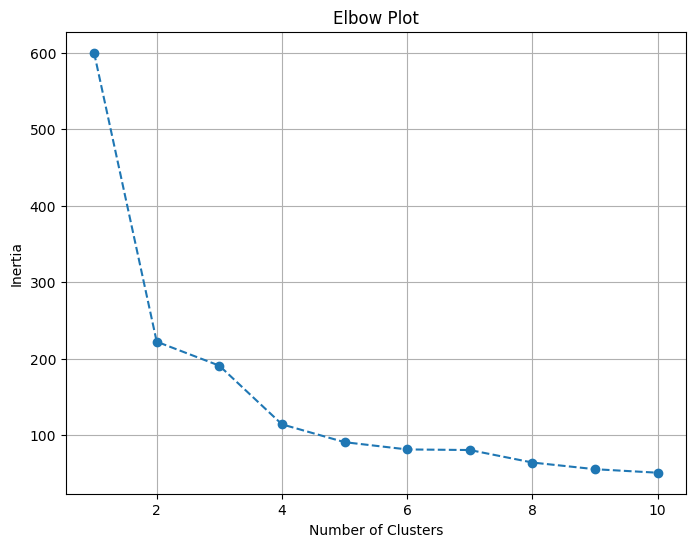

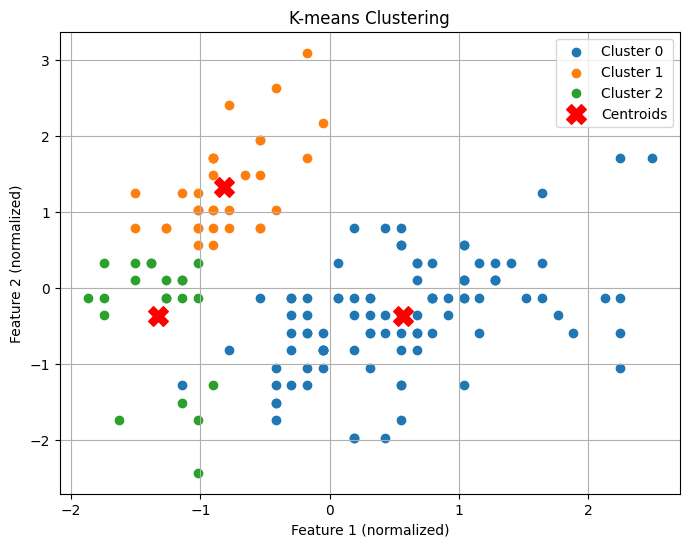

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data  

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Elbow plot to determine the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o', linestyle='--')
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Implementing k-means with optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_normalized)

# Visualizing the clustered data (using first two features)
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(X_normalized[y_kmeans == i, 0], X_normalized[y_kmeans == i, 1],
                label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', label='Centroids', marker='X')
plt.title("K-means Clustering")
plt.xlabel("Feature 1 (normalized)")
plt.ylabel("Feature 2 (normalized)")
plt.legend()
plt.grid(True)
plt.show()